# `natural=peak` object tags analysis

In [1]:
import requests
import overpy

overpass_url = 'https://lz4.overpass-api.de/api/interpreter'
overpass_query = """
      [date:"2021-09-01T00:00:00Z"];
      area(3600090689)->.searchArea;
      (
        node["natural"="peak"](area.searchArea);
      );
      out;"""

response = requests.get(overpass_url, params={ 'data': overpass_query})

api = overpy.Overpass()

result = api.parse_xml(response.text)

In [3]:
import pandas as pd

peaks_tags = map(lambda r: {'id': r.id, **r.tags}, result.nodes)
peaks_df = pd.DataFrame(peaks_tags)
peaks_df.sample(10)

,id,alt_name,accuracy,ele,importance,name,name:hu,natural,prominence,source,...,is_in:hu,memorial,network,landmark,name:rn,alt:name,alt_ele,eve,elevation,place
1113,2353498865,NaN,NaN,2053.54,NaN,Fratoșteanu,NaN,peak,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
528,888298319,NaN,NaN,1759.0,NaN,Oslea Românească,NaN,peak,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3836,8701817090,NaN,NaN,1597,NaN,NaN,NaN,peak,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,264218456,NaN,NaN,NaN,NaN,Dealul Viișoara,NaN,peak,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4032,9032333529,NaN,NaN,NaN,NaN,NaN,NaN,peak,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3421,8176241737,NaN,NaN,1904,NaN,Dealul Tabla,NaN,peak,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3591,8394962793,NaN,NaN,1232,NaN,NaN,NaN,peak,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1773,3665450859,NaN,NaN,2342,NaN,Boia,NaN,peak,NaN,SRTM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1337,2707020314,NaN,NaN,516,NaN,Bolovanu,NaN,peak,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2388,5251023316,NaN,NaN,370.0,NaN,Tîlva Înalta,NaN,peak,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
pd.set_option('display.max_rows', None)
peaks_df.count().sort_values(ascending=False)

id                    4081
natural               4081
name                  3345
ele                   3050
source                 600
name:hu                370
prominence              82
name:ro                 66
wikidata                60
alt_name                58
name:en                 58
wikipedia               58
source:position         46
tourism                 29
name:de                 28
importance              21
note                    20
fixme                   19
name:uk                 17
alt_name:hu             16
created_by              14
summit:cross            10
todo                     9
material                 8
name:pl                  8
description              7
name:cs                  6
source:ele               4
wpt_symbol               4
name:ru                  3
wikipedia:uk             2
source:name:hu           2
source:name              2
information              2
guidepost                2
summit:register          2
alt_name_1               2
w

## Naming

On the [naming good practices OSM wiki page](https://wiki.openstreetmap.org/wiki/Names#Good_Practice) points are made about
not adding _abbreviations_ or _feature types_ to names.  
We can see instances of the abbreviation for "Vârful" as  "Vf.", "vf.", "vf" and "Vf..".  
Feature type specification in the name appears as  "Vârful", "vârful", "vârfu" and other variations.  

There are peak names that contain the word "Vârful" in the official name.  

What follows is a short analysis for the most common cases.  

In [5]:
from unidecode import unidecode

ftin_names_abbr_df = peaks_df.loc[peaks_df['name'].map(lambda s: any(p in unidecode(str(s)).lower() for p in ["varf"]))][['id', 'name']]
ftin_names_varf_df = peaks_df.loc[peaks_df['name'].map(lambda s: any(p in unidecode(str(s)).lower() for p in ["vf"]))][['id', 'name']]
ftin_names_df = ftin_names_varf_df.append(ftin_names_abbr_df)

In [6]:
count_peaks = peaks_df['name'].size
count_with_name = peaks_df['name'].dropna().size
count_without_name = count_peaks - count_with_name
count_ftin_name = ftin_names_df.shape[0]
count_ftin_name_abbr = ftin_names_abbr_df.shape[0]
count_ftin_name_varf = ftin_names_varf_df.shape[0]

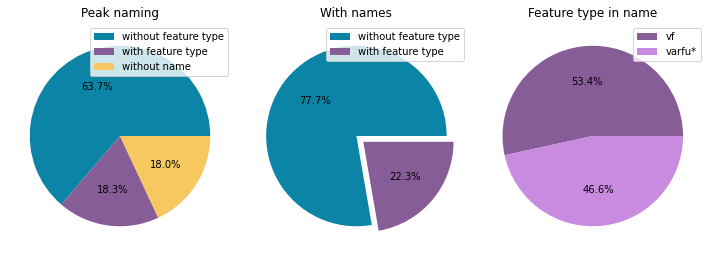

In [12]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1,3)
ax1.pie([count_with_name - count_ftin_name, count_ftin_name, count_without_name], explode=(0, 0.0, 0), autopct='%1.1f%%', colors=['#0b84a5', '#865d96', '#f6c85f'])
ax2.pie([count_with_name - count_ftin_name, count_ftin_name], explode=(0, 0.1), autopct='%1.1f%%', colors=['#0b84a5', '#865d96'])
ax3.pie([count_ftin_name_abbr, count_ftin_name_varf], explode=(0,0), autopct='%1.1f%%', colors=['#865d96', '#c88be0'])
ax1.legend(loc='best', labels=['without feature type', 'with feature type', 'without name'])
ax1.set_title('Peak naming')
ax2.legend(loc='best', labels=['without feature type', 'with feature type'])
ax2.set_title('With names')
ax3.legend(loc='best', labels=['vf', 'varfu*'])
ax3.set_title('Feature type in name')
fig.set_figheight(5)
fig.set_figwidth(10)
fig.tight_layout()
plt.show()

In [10]:
count_peaks, count_with_name, count_without_name, count_ftin_name, count_ftin_name_abbr, count_ftin_name_varf

(4081, 3345, 736, 745, 398, 347)

# Elevation

There are two objects tagged with `eve` and `elevation`.
The standard elevation tag is `ele`.